In [13]:
import logging
import hydra
import pandas as pd


from collections import defaultdict
from tqdm import tqdm 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.patches import Ellipse

from erc import drawing_ellipse, split_df_by_gender
from sklearn.cluster import KMeans


In [3]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

with hydra.initialize(version_base=None, config_path="./config"):
    cfg = hydra.compose(config_name="config")
dataset = hydra.utils.instantiate(cfg.dataset)


INFO:erc.utils:Instantiate KEMDy19 Dataset
INFO:erc.utils:Instantiate KEMDy20 Dataset


## Emotion EDA

In [4]:
# Emotion dataframe 
eva_dict = defaultdict(list)
for sample in tqdm(dataset):
    for key_ in ['emotion','valence','arousal','gender']:
        if (sample.get(key_) == None):
            pass
        else:    
            eva_dict[key_].append(sample.get(key_).item())
            
df = pd.DataFrame(eva_dict)
df = df[df['emotion']!=-1]



100%|██████████| 17510/17510 [00:33<00:00, 525.17it/s]


In [5]:
# 성별 
print('Male: {:04d}, Female: {:04d}'.format(*df['gender'].value_counts().values))

# Valence min-max 
for key in ['valence','arousal']:
    print(f'{key}: \n\tMin: {min(df[key]):.2f}\n\tMax: {max(df[key]):.2f}')



Male: 9535, Female: 7919
valence: 
	Min: 1.00
	Max: 5.00
arousal: 
	Min: 1.40
	Max: 5.00


In [6]:
total_dict=split_df_by_gender(df)
male_dict,female_dict = split_df_by_gender(df, total=False)


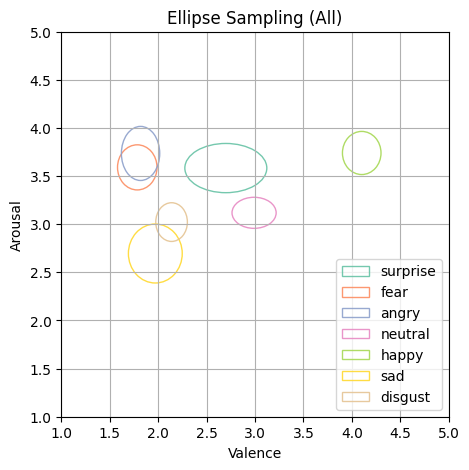

In [7]:
drawing_ellipse(total_dict)

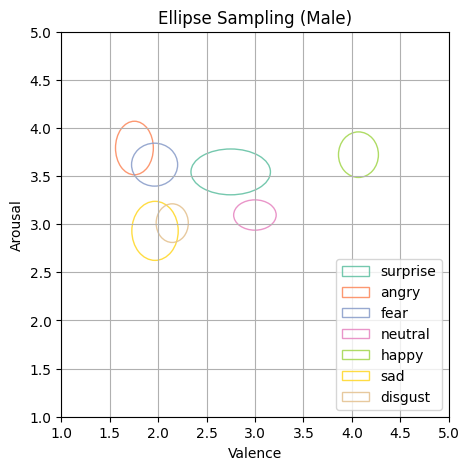

In [8]:
drawing_ellipse(male_dict, title='Ellipse Sampling (Male)')


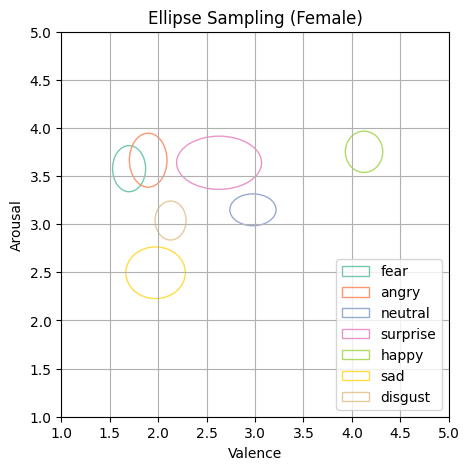

In [9]:
drawing_ellipse(female_dict, title='Ellipse Sampling (Female)')

/tmp/ipykernel_669452/123573891.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])


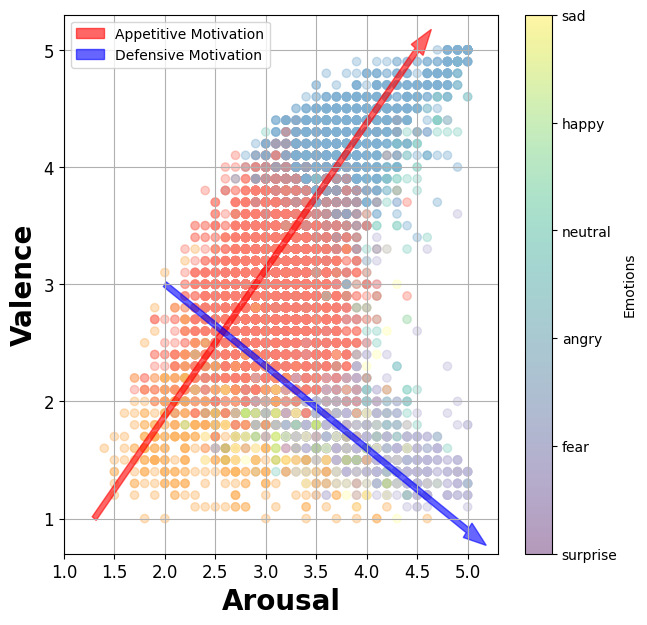

In [10]:

# refer : IAPS affective rating


color_palette   = mpl.colormaps['viridis']
# cmap = cm.bwr ## 또는 plt.cm.get_cmap('bwr')
vmax = 6
vmin = 0
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
colormapping = cm.ScalarMappable(norm=norm, cmap=color_palette)


sns_palette = sns.color_palette('Set3')

label_fsize = 20
ticks_fsize = 12
legend_size = 10

plt.figure(figsize=(7,7))
plt.scatter(df['arousal'], df['valence'],
            color=[sns_palette[int(i)] for i in df['emotion']],
            # cmap = colormapping,
            alpha=0.4)


plt.arrow(1.3, 1, 3.2,4, width = 0.05 ,label='Appetitive Motivation', alpha=0.6,color='red')
plt.arrow(2, 3,   3, -2.1,width = 0.05 ,label='Defensive Motivation', alpha=0.6,color='blue')




plt.xlabel('Arousal', fontweight='bold', fontsize=label_fsize)
plt.ylabel('Valence', fontweight='bold', fontsize=label_fsize)
plt.xlim(1,5.3)
plt.ylim(0.7,5.3)
plt.grid(True)
plt.yticks(fontsize=ticks_fsize, fontweight='normal')
plt.xticks(fontsize=ticks_fsize,
            fontweight='normal',
            )
plt.legend(loc='upper left',fontsize=legend_size,)

cb = plt.colorbar(label='Emotions', ax=plt.gca())
# cb.set_ticks([0,1,2,3,4,5,6])
cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])
# plt.legend(,
            #    loc='upper left',
            #    fontsize=legend_size,
            #    )
plt.show()

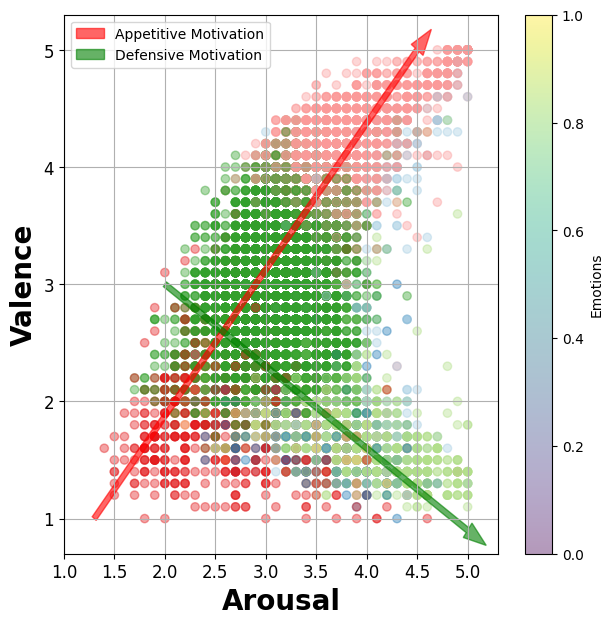

In [11]:
# refer : IAPS affective rating

color_palette = sns.color_palette("Paired")
label_fsize = 20
ticks_fsize = 12
legend_size = 10

plt.figure(figsize=(7,7))


plt.scatter(df['arousal'], df['valence'],
            # color=[f'C{int(i)}' for i in df['emotion']],
            color=[color_palette[int(i)] for i in df['emotion']],
            # edgecolors='black',linewidth=1,
            # label=df['emotion'],
            # label=[f'{emotion_r.get(i)}' for i in df['emotion']],
            alpha=0.4)


# plt.plot([1.3,4.7],[1,5.2],label='Appetitive Motivation', alpha=0.9,color='red')
plt.arrow(1.3, 1, 3.2,4, width = 0.05 ,label='Appetitive Motivation', alpha=0.6,color='red')
# plt.plot([2,5.2],[3,1],label='Appetitive Motivation', alpha=0.7,color='green')
plt.arrow(2, 3,   3, -2.1,width = 0.05 ,label='Defensive Motivation', alpha=0.6,color='green')
# plt.plot(x,z,label='z=3x')
# plt.legend(bbox_to_anchor=(1,1))

# [ 출처: https://seong6496.tistory.com/ ]



plt.xlabel('Arousal', fontweight='bold', fontsize=label_fsize)
plt.ylabel('Valence', fontweight='bold', fontsize=label_fsize)
plt.xlim(1,5.3)
plt.ylim(0.7,5.3)
plt.grid(True)
plt.yticks(fontsize=ticks_fsize, fontweight='normal')
plt.xticks(fontsize=ticks_fsize,
            fontweight='normal',
            )
plt.legend(loc='upper left',fontsize=legend_size,)



from matplotlib.colors import ListedColormap
# cmap = 
# cmap = ListedColormap(sns.color_palette("Paired"))
plt.colorbar(label='Emotions', ax=plt.gca())

# cb = plt.colorbar(label='Emotions', ax=plt.gca())

# cb.set_ticks([0,1,2,3,4,5,6])
# cb.set_ticklabels(, ,['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])
# plt.legend(,
            #    loc='upper left',
            #    fontsize=legend_size,
            #    )
plt.show()


/home/hoesungryu/.conda/envs/etri-erc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


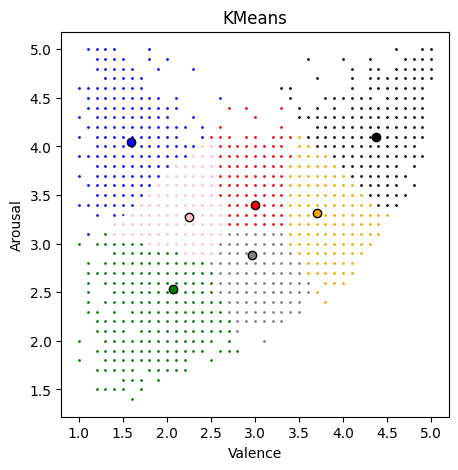

In [14]:
colors = ['black', 'red', 'blue', 'orange', 'pink', 'grey', 'green']
values= df[['valence','arousal']].values


kmeans_model = KMeans(n_clusters=7, random_state=0)
kmeans_model.fit(values)

k_means_labels = kmeans_model.predict(values)
k_means_cluster_centers = kmeans_model.cluster_centers_

fig, ax = plt.subplots(figsize=(5, 5))
for k, col in zip(range(7), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(values[my_members, 0], values[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
    
ax.set_title('KMeans')
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
def get_accuracy(df, label = 'emotion', drop_col=[]):
        if len(drop_col) != 0:
                df = df.drop(drop_col, axis=1)

        X = df.drop([label],axis=1)
        y = df[label]

        model = RandomForestClassifier()
        predicted = cross_val_predict(model, X, y, cv=10)

        acc = accuracy_score(y, predicted)
        # auc = roc_auc_score(y, predicted,average='weighted', multi_class='ovo')
        f1 = f1_score(y, predicted, average='weighted')

        print(f'CV Acc: {acc:.4f}')
        # print(f'CV AUC: {auc:.4f}')
        print(f'CV F1: {f1:.4f}')
        print(' ')

print(get_accuracy(df, label='emotion'))
print(get_accuracy(df, label='emotion', drop_col='gender'))
print(get_accuracy(df, label='gender'))

CV Acc: 0.8038
CV F1: 0.7799
 
None
CV Acc: 0.8074
CV F1: 0.7783
 
None
CV Acc: 0.5737
CV F1: 0.5612
 
None
